# Libraries

In [295]:
# Data Engineering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

# Evaluation Metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Model Comparison
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

#Plots
plt.rcParams['figure.figsize']=(16,8)

# Train Data

In [203]:
# read the train file
df=pd.read_csv('train.csv')
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [205]:
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### Missing Values

In [206]:
missing_val=pd.DataFrame(zip(df.isnull().sum(),df.isnull().sum()*100/len(df)),columns=['Missing Values','Percentage Missing Values'],index=df.columns)
missing_val

,Missing Values,Percentage Missing Values
id,0,0.000000
created_at,0,0.000000
campaign_var_1,0,0.000000
campaign_var_2,0,0.000000
products_purchased,20911,53.397513
signup_date,15113,38.591966
user_activity_var_1,0,0.000000
user_activity_var_2,0,0.000000
user_activity_var_3,0,0.000000
user_activity_var_4,0,0.000000


There are 53% missing values in products purchased. Treatment is required in Signup date and Products purchased column depending the data. 

As from the data, it can be inferred that the customer base can be both online and offline.

Therefore creating a column with flag 1 as customers who have actively participated in online campaign and flag 0 for customers who participated in offline campaigns.


In [207]:
on=df[df['signup_date'].isnull()]
on['Online']=1
off=df[~df['signup_date'].isnull()]
off['Online']=0
df=pd.concat([on,off],axis=0)
df=df.sort_index()

In [208]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [209]:
df['signup_date']=df['signup_date'].fillna(df['created_at'].min())

In [210]:
df['Period']=df['created_at']-df['signup_date']
df['Period']=df['created_at']-df['signup_date']

In [211]:
df['Period']=df['Period'].astype('timedelta64[D]')

#### Imputation in train data

In [212]:
# drop the unwanted features
df=df.drop(['id','signup_date','created_at'], axis = 1)
df['products_purchased'].fillna(0,axis=0,inplace=True)

In [213]:
df.isnull().sum()

campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
Online                  0
Period                  0
dtype: int64

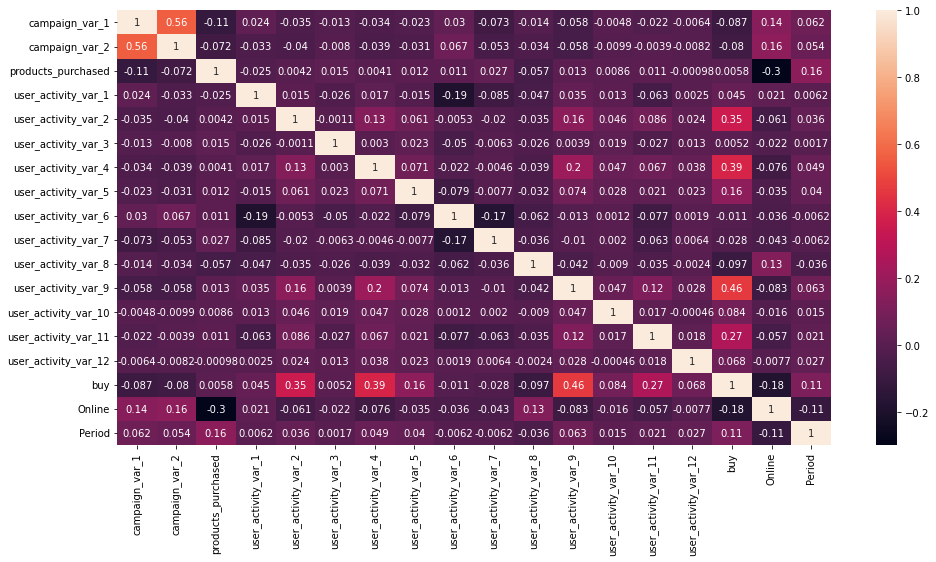

In [214]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Test Data

In [215]:
# read the test file
test_file = pd.read_csv("test.csv")
test_file.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [216]:
# extract id from test data
testid=test_file['id']

In [217]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

In [218]:
test_file.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
count,13184.000000,13184.000000,13184.000000,5048.000000,13184.000000,13184.000000,13184.000000,13184.00000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000
mean,45753.500000,7.724439,7.943416,2.108954,0.386681,0.004248,0.103307,0.00713,0.153064,0.525485,0.304460,0.142673,0.008419,0.000228,0.253413,0.000228
std,3806.037309,3.599981,2.687832,0.783483,0.505653,0.065037,0.304371,0.08414,0.360695,0.565208,0.462989,0.349969,0.092200,0.015084,0.462698,0.015084
min,39162.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42457.750000,5.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45753.500000,8.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49049.250000,10.000000,10.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52345.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.00000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


# Feature Engineering

In [219]:
test_file['created_at'] = pd.to_datetime(test_file['created_at'])
test_file['signup_date'] = pd.to_datetime(test_file['signup_date'])

In [220]:
test_file['signup_date']=test_file['signup_date'].fillna(test_file['created_at'].min())

In [221]:
test_file['Period']=test_file['created_at']-test_file['signup_date']
test_file['Period']=test_file['created_at']-test_file['signup_date']

### Missing values

In [222]:
missing_val_test=pd.DataFrame(zip(test_file.isnull().sum(),test_file.isnull().sum()*100/len(test_file)),columns=['Missing Values','Percentage Missing Values'],index=test_file.columns)
missing_val_test

,Missing Values,Percentage Missing Values
id,0,0.000000
created_at,0,0.000000
campaign_var_1,0,0.000000
campaign_var_2,0,0.000000
products_purchased,8136,61.711165
signup_date,0,0.000000
user_activity_var_1,0,0.000000
user_activity_var_2,0,0.000000
user_activity_var_3,0,0.000000
user_activity_var_4,0,0.000000


There are 61% missing values in products purchased. Treatment is required in Signup date and Products purchased column depending the data. 

As from the data, it can be inferred that the customer base can be both online and offline.

Therefore creating a column with flag 1 as customers who have actively participated in online campaign and flag 0 for customers who participated in offline campaigns.


In [223]:
on=test_file[test_file['signup_date'].isnull()]
on['Online']=1
off=test_file[~test_file['signup_date'].isnull()]
off['Online']=0
test_file=pd.concat([on,off],axis=0)
test_file=test_file.sort_index()

#### Imputation for missing values

In [224]:
test_file=test_file.drop(['id','signup_date','created_at'], axis = 1)
test_file['products_purchased'].fillna(0,axis=0,inplace=True)

In [225]:
test_file['Period']=test_file['Period'].astype('timedelta64[D]')

In [226]:
# Train Test Split on Train dataset 
y=df['buy']
X=df.drop('buy',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Univariate Analysis

<AxesSubplot:xlabel='buy', ylabel='count'>

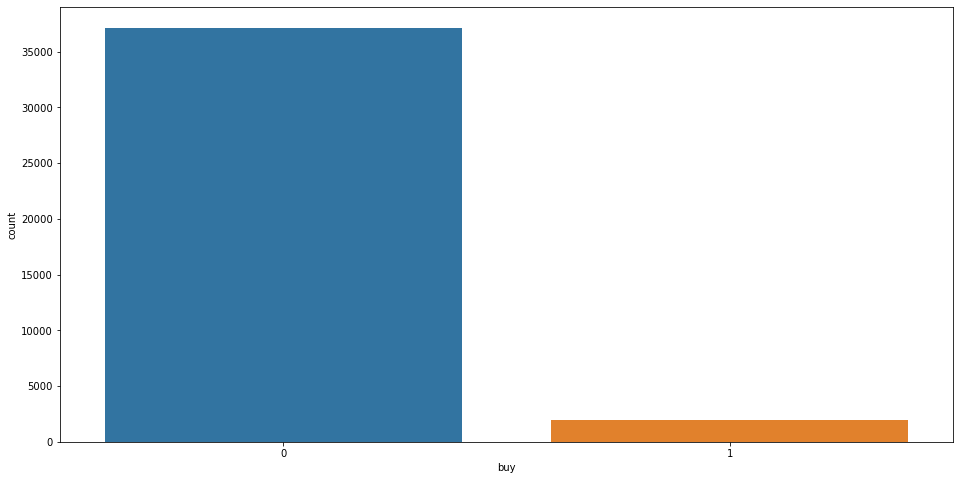

In [227]:
sns.countplot(df['buy'])

Significant amount of Imbalance observed in the target feature

# Bi-Variate Analysis

<AxesSubplot:xlabel='buy', ylabel='Period'>

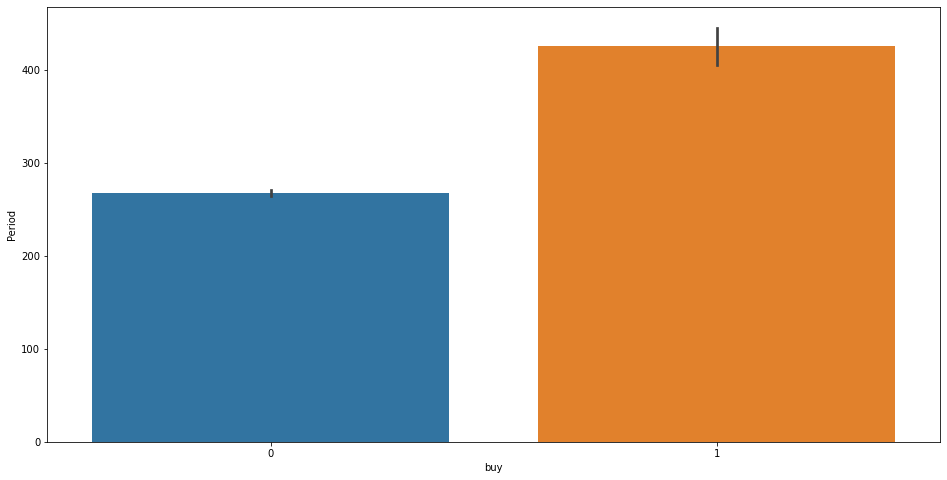

In [228]:
sns.barplot(y=df['Period'],x=df['buy'])

Higher periods indicate that customers tend to buy in coming 3 months

<AxesSubplot:xlabel='buy', ylabel='products_purchased'>

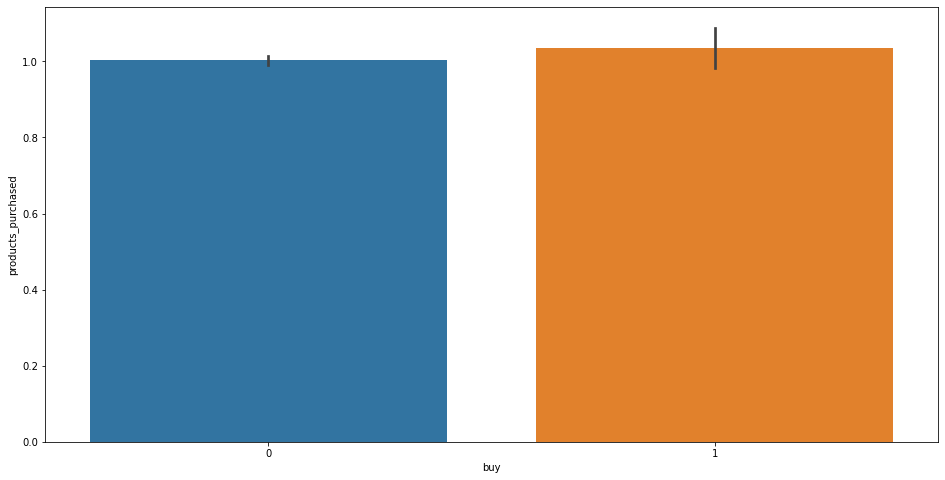

In [229]:
sns.barplot(y=df['products_purchased'],x=df['buy'])

There is marginal difference when past purchase history of customers are taken into account whether customers will buy or not.

# Modelling

### Base Model - Random Forest

In [242]:
rf = RandomForestClassifier(max_depth=22,n_estimators=200).fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.99
Accuracy of Random Forest classifier on test set: 0.98


In [233]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.974 (0.002)


Accuracy and Standard deviation are good.

In [235]:
Feature_imp=pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by='Imp',ascending=False)
Feature_imp

,Imp
user_activity_var_9,0.199131
Period,0.160788
user_activity_var_11,0.130435
user_activity_var_4,0.129396
user_activity_var_2,0.098032
campaign_var_1,0.063014
campaign_var_2,0.057618
products_purchased,0.033281
user_activity_var_5,0.029441
Online,0.022955


### Classification Report - Random Forest

In [263]:
print('Classification Report of the training data:\n\n',classification_report(y_test,rf.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.91      0.59      0.71       403

    accuracy                           0.98      7833
   macro avg       0.94      0.79      0.85      7833
weighted avg       0.97      0.98      0.97      7833
 



In [249]:
# prediction of test file
rfout=rf.predict(test_file)
rfoutf=pd.Series(rfout)
rfoutf.to_csv('RF_pred.csv',header=None,index=None)
rfpred=pd.concat([testid,rfoutf],axis=1)
rfpred.to_csv('RF_pred.csv',index=False, header=['id','buy'])

## Decision Tree

In [241]:
dt = DecisionTreeClassifier(criterion = 'gini',random_state=42).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.98


In [244]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model
scores = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.954 (0.004)


Accuracy and Standard deviation are good.

In [243]:
Feature_imp=pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by='Imp',ascending=False)
Feature_imp

,Imp
Period,0.239634
user_activity_var_9,0.216095
user_activity_var_4,0.108361
user_activity_var_2,0.081576
user_activity_var_11,0.081515
campaign_var_1,0.074007
campaign_var_2,0.061580
Online,0.024290
products_purchased,0.024273
user_activity_var_6,0.023320


### Classification Report - Decision Tree

In [265]:
print('Classification Report of the training data:\n\n',classification_report(y_test,dt.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      0.97      0.98      7430
           1       0.54      0.63      0.58       403

    accuracy                           0.95      7833
   macro avg       0.76      0.80      0.78      7833
weighted avg       0.96      0.95      0.96      7833
 



In [238]:
# prediction of test file
dtout=dt.predict(test_file)
dtoutf=pd.Series(dtout)
dtoutf.to_csv('DT_pred.csv',header=None,index=None)
dtpred=pd.concat([testid,dtoutf],axis=1)
dtpred.to_csv('DT_pred.csv',index=False, header=['id','buy'])

# XGBoost

In [285]:
xg = XGBClassifier(n_estimators=100,max_depth=8,n_jobs=-1,random_state=42,er).fit(X_train, y_train)
print('Accuracy of XGBclassifier on training set: {:.2f}'
     .format(xg.score(X_train, y_train)))
print('Accuracy of XGBclassifier on test set: {:.2f}'
     .format(xg.score(X_test, y_test)))

[02:16:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBclassifier on training set: 0.98
Accuracy of XGBclassifier on test set: 0.98


In [270]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model
scores = cross_val_score(xg, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.973 (0.002)


Accuracy and Standard deviation are good.

In [271]:
Feature_imp=pd.DataFrame(xg.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by='Imp',ascending=False)
Feature_imp

,Imp
user_activity_var_9,0.451848
user_activity_var_2,0.146746
Online,0.127329
user_activity_var_4,0.126477
user_activity_var_11,0.040169
user_activity_var_8,0.027289
user_activity_var_5,0.016963
user_activity_var_12,0.013147
products_purchased,0.007323
user_activity_var_1,0.007290


### Classification Report - XGBoost

In [272]:
print('Classification Report of the training data:\n\n',classification_report(y_test,xg.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.89      0.59      0.71       403

    accuracy                           0.98      7833
   macro avg       0.93      0.79      0.85      7833
weighted avg       0.97      0.98      0.97      7833
 



In [274]:
# prediction of test file
xgout=dt.predict(test_file)
xgoutf=pd.Series(xgout)
xgoutf.to_csv('XG_pred.csv',header=None,index=None)
xgpred=pd.concat([testid,xgoutf],axis=1)
xgpred.to_csv('XG_pred.csv',index=False, header=['id','buy'])

# Gradient Boosting Classifier

In [284]:
gb = GradientBoostingClassifier(n_estimators=10,random_state=42,max_depth=8).fit(X_train, y_train)
print('Accuracy of Gradient Boosting Classifier on training set: {:.2f}'
     .format(gb.score(X_train, y_train)))
print('Accuracy of Gradient Boosting Classifier on test set: {:.2f}'
     .format(gb.score(X_test, y_test)))

Accuracy of Gradient Boosting Classifier on training set: 0.98
Accuracy of Gradient Boosting Classifier on test set: 0.98


In [277]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model
scores = cross_val_score(gb, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.974 (0.002)


In [278]:
Feature_imp=pd.DataFrame(gb.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by='Imp',ascending=False)
Feature_imp

,Imp
user_activity_var_9,0.381346
user_activity_var_4,0.194803
user_activity_var_11,0.149084
user_activity_var_2,0.143682
Online,0.046169
user_activity_var_5,0.037312
Period,0.016624
campaign_var_1,0.007536
products_purchased,0.006031
user_activity_var_8,0.005663


In [281]:
print('Classification Report of the training data:\n\n',classification_report(y_test,gb.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.97      0.56      0.71       403

    accuracy                           0.98      7833
   macro avg       0.98      0.78      0.85      7833
weighted avg       0.98      0.98      0.97      7833
 



In [282]:
# prediction of test file
gbout=dt.predict(test_file)
gboutf=pd.Series(gbout)
gboutf.to_csv('GB_pred.csv',header=None,index=None)
gbpred=pd.concat([testid,gboutf],axis=1)
gbpred.to_csv('GB_pred.csv',index=False, header=['id','buy'])

# Bagging Classifier

In [286]:
dtc = DecisionTreeClassifier()
bm=BaggingClassifier(base_estimator=dtc,n_estimators=100,random_state=42).fit(X_train,y_train)
print('Accuracy of Gradient Boosting Classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Gradient Boosting Classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of Gradient Boosting Classifier on training set: 0.99
Accuracy of Gradient Boosting Classifier on test set: 0.98


In [288]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model
scores = cross_val_score(bm, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.973 (0.003)


In [291]:
feature_importances = np.mean([tree.feature_importances_ for tree in bm.estimators_], axis=0)

In [292]:
Feature_imp=pd.DataFrame(feature_importances, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp',ascending=False)
Feature_imp

,Imp
Period,0.237591
user_activity_var_9,0.215853
user_activity_var_4,0.104953
user_activity_var_11,0.084129
user_activity_var_2,0.081462
campaign_var_1,0.065390
campaign_var_2,0.060871
products_purchased,0.027730
Online,0.023513
user_activity_var_6,0.023183


In [293]:
print('Classification Report of the training data:\n\n',classification_report(y_test,bm.predict(X_test)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.87      0.60      0.71       403

    accuracy                           0.97      7833
   macro avg       0.92      0.80      0.85      7833
weighted avg       0.97      0.97      0.97      7833
 



In [294]:
# prediction of test file
bmout=dt.predict(test_file)
bmoutf=pd.Series(bmout)
bmoutf.to_csv('BM_pred.csv',header=None,index=None)
bmpred=pd.concat([testid,bmoutf],axis=1)
bmpred.to_csv('BM_pred.csv',index=False, header=['id','buy'])

# Model Comparsion

In [297]:
# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
gb_model = GradientBoostingClassifier()
bc_model = BaggingClassifier(base_estimator=dtc)
xgb_model = XGBClassifier()
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()


# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    bc = cross_validate(bc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    gb = cross_validate(gb_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    xgb = cross_validate(xgb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Bagging Classifier':[bc['test_accuracy'].mean(),
                                                               bc['test_precision'].mean(),
                                                               bc['test_recall'].mean(),
                                                               bc['test_f1_score'].mean()],
                                       
                                      'Decision Tree Classifier':[dtr['test_accuracy'].mean(),
                                                                   dtr['test_precision'].mean(),
                                                                   dtr['test_recall'].mean(),
                                                                   dtr['test_f1_score'].mean()],
                                       
                                      'Gradient Boost Classifier':[gb['test_accuracy'].mean(),
                                                       gb['test_precision'].mean(),
                                                       gb['test_recall'].mean(),
                                                       gb['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Xgboost Classifier':[xgb['test_accuracy'].mean(),
                                                              xgb['test_precision'].mean(),
                                                              xgb['test_recall'].mean(),
                                                              xgb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(X_train, y_train, 5)

[02:29:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:29:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:29:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:29:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Bagging Classifier,Decision Tree Classifier,Gradient Boost Classifier,Random Forest,Xgboost Classifier,Best Score
Accuracy,0.972197,0.954641,0.974655,0.974113,0.973442,Gradient Boost Classifier
Precision,0.848172,0.550474,0.925609,0.899364,0.881047,Gradient Boost Classifier
Recall,0.553605,0.596238,0.546082,0.553605,0.553605,Decision Tree Classifier
F1 Score,0.669483,0.572384,0.686538,0.685094,0.679566,Gradient Boost Classifier
